## Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location.



# 1) Aggregate these login counts based on 15minute time intervals 

# 2) visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 

# 3) report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

# Loading the data

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import datetime 
import seaborn as sns

In [2]:
#Load logins.json
df_time_log = pd.read_json('logins.json')
df_time_log.head(20)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [3]:
df_time_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df_time_log.columns

Index(['login_time'], dtype='object')

In [5]:
df_time_log.shape

(93142, 1)

In [6]:
df_time_log.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [7]:
df_time_log.dtypes

login_time    datetime64[ns]
dtype: object

## Exploring quality of data

In [8]:
#check for missing values
df_time_log.isna().sum()

login_time    0
dtype: int64

In [9]:
df_time_log.value_counts()

login_time         
1970-01-06 21:45:52    3
1970-01-09 01:31:25    3
1970-04-12 04:03:15    3
1970-02-12 11:16:53    3
1970-04-04 01:17:40    3
                      ..
1970-02-13 21:12:59    1
1970-02-13 21:12:39    1
1970-02-13 21:12:33    1
1970-02-13 21:12:19    1
1970-04-13 18:57:38    1
Name: count, Length: 92265, dtype: int64

In [10]:
#Check for duplicates
duplicates = df_time_log.duplicated()
print(f'number of duplicates {duplicates.sum()}')

number of duplicates 877


In [11]:
#Drop duplicates

#Potential issue: It could be the case that multiple taxis picked up people at the exact same time, therefore these values would be legitamite and should not be dropped. 
df_time_log = df_time_log.drop_duplicates()

In [12]:
df_time_log.shape

(92265, 1)

In [13]:
df_time_log.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


## Login_time EDA

<Axes: >

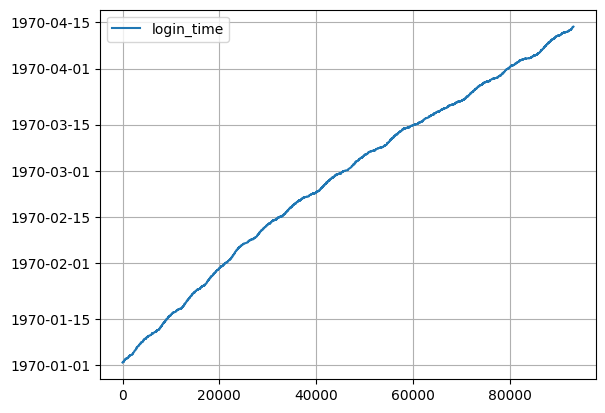

In [14]:
#Basic plot to get a sense of what the data looks like
df_time_log.plot(grid=True)

# Ideas:

## Group by minute intervals such as 15, 30. Group by hours to get a general sense of busy times in the day. Group by days M,T,W, TH, F,S, SUN

## Try to identify busiest times and days.



In [15]:
df_hours = df_time_log['login_time'].dt.floor('H')

hours_grouped = df_time_log.groupby(df_hours)

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/2614778257.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hours = df_time_log['login_time'].dt.floor('H')


<Axes: >

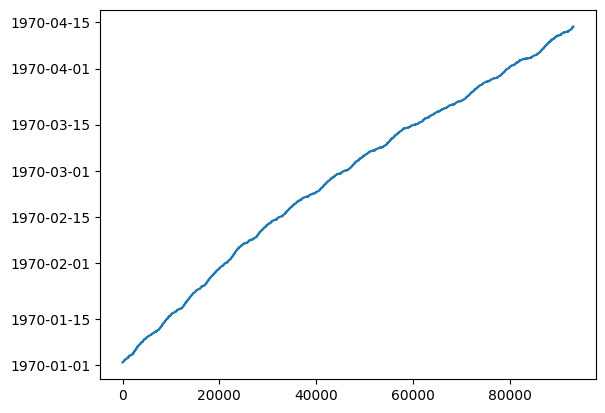

In [16]:
df_hours.plot()

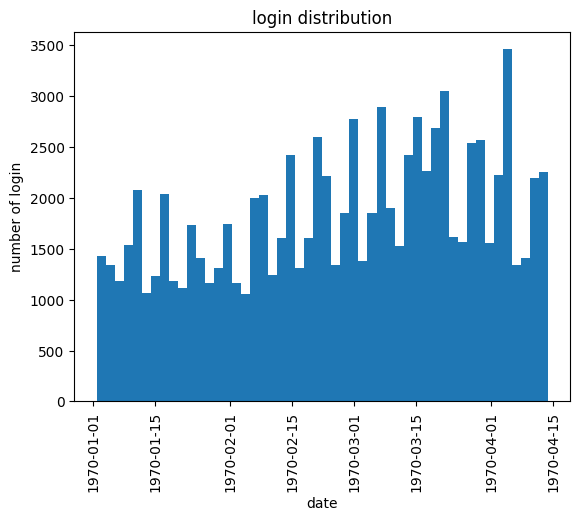

In [17]:
login = df_time_log['login_time']

_ = plt.hist(login, bins=50)
_ = plt.xlabel('date')
_ = plt.ylabel('number of login')
_ = plt.xticks(rotation=90)
_ = plt.title('login distribution')

In [18]:
#Aggregating counts based on 15 min intervals 

#round down to nearest 15 min interval
df_time_log['interval'] = df_time_log['login_time'].dt.floor('15min')

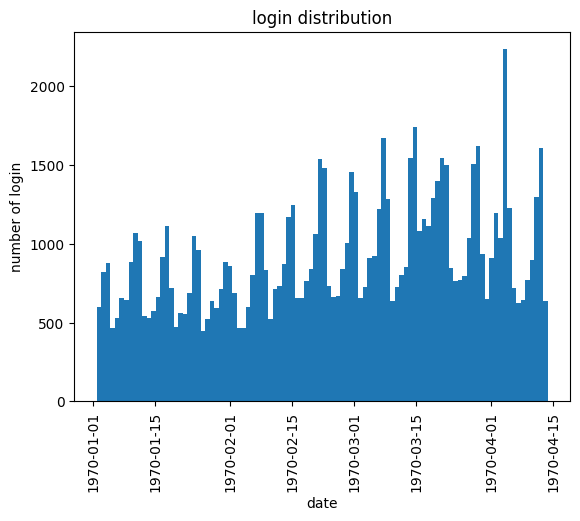

In [19]:
login2 = df_time_log['interval']

_ = plt.hist(login2, bins=100)
_ = plt.xlabel('date')
_ = plt.ylabel('number of login')
_ = plt.xticks(rotation=90)
_ = plt.title('login distribution')

## Observations: There is a pattern here. Further exploration is needed. I should try and identify patterns in hours or days. 

In [20]:
login2.head()

0   1970-01-01 20:00:00
1   1970-01-01 20:15:00
2   1970-01-01 20:15:00
3   1970-01-01 20:15:00
4   1970-01-01 20:15:00
Name: interval, dtype: datetime64[ns]

In [21]:
#convert series to df
login2_df = login2.to_frame(name='interval')

In [22]:
login2_df['hours_minutes'] = login2_df['interval'].dt.strftime('%H:%M')

In [23]:
login2_df.head()

,interval,hours_minutes
0,1970-01-01 20:00:00,20:00
1,1970-01-01 20:15:00,20:15
2,1970-01-01 20:15:00,20:15
3,1970-01-01 20:15:00,20:15
4,1970-01-01 20:15:00,20:15


In [24]:
login2_df.value_counts()

interval             hours_minutes
1970-03-01 04:30:00  04:30            68
1970-04-04 05:30:00  05:30            64
1970-04-04 01:30:00  01:30            62
1970-04-01 23:30:00  23:30            60
1970-04-04 01:15:00  01:15            57
                                      ..
1970-01-10 08:30:00  08:30             1
1970-01-10 08:15:00  08:15             1
1970-03-20 07:00:00  07:00             1
1970-01-10 06:45:00  06:45             1
1970-03-18 07:15:00  07:15             1
Name: count, Length: 9381, dtype: int64

In [25]:
login2_df.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       93132, 93133, 93134, 93135, 93136, 93137, 93138, 93139, 93140, 93141],
      dtype='int64', length=92265)

In [26]:
login2_df.info

<bound method DataFrame.info of                  interval hours_minutes
0     1970-01-01 20:00:00         20:00
1     1970-01-01 20:15:00         20:15
2     1970-01-01 20:15:00         20:15
3     1970-01-01 20:15:00         20:15
4     1970-01-01 20:15:00         20:15
...                   ...           ...
93137 1970-04-13 18:45:00         18:45
93138 1970-04-13 18:30:00         18:30
93139 1970-04-13 18:45:00         18:45
93140 1970-04-13 18:45:00         18:45
93141 1970-04-13 18:45:00         18:45

[92265 rows x 2 columns]>

In [27]:
login2_df.dtypes

interval         datetime64[ns]
hours_minutes            object
dtype: object

In [28]:
print(login2_df['hours_minutes'].dtype)

object


In [29]:
login2_df['hours_minutes'] = login2_df['hours_minutes'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M').time())

In [30]:
hours_mins = login2_df['hours_minutes']

In [31]:
hours_mins.info

<bound method Series.info of 0        20:00:00
1        20:15:00
2        20:15:00
3        20:15:00
4        20:15:00
           ...   
93137    18:45:00
93138    18:30:00
93139    18:45:00
93140    18:45:00
93141    18:45:00
Name: hours_minutes, Length: 92265, dtype: object>

In [32]:
hours_mins.dtype

dtype('O')

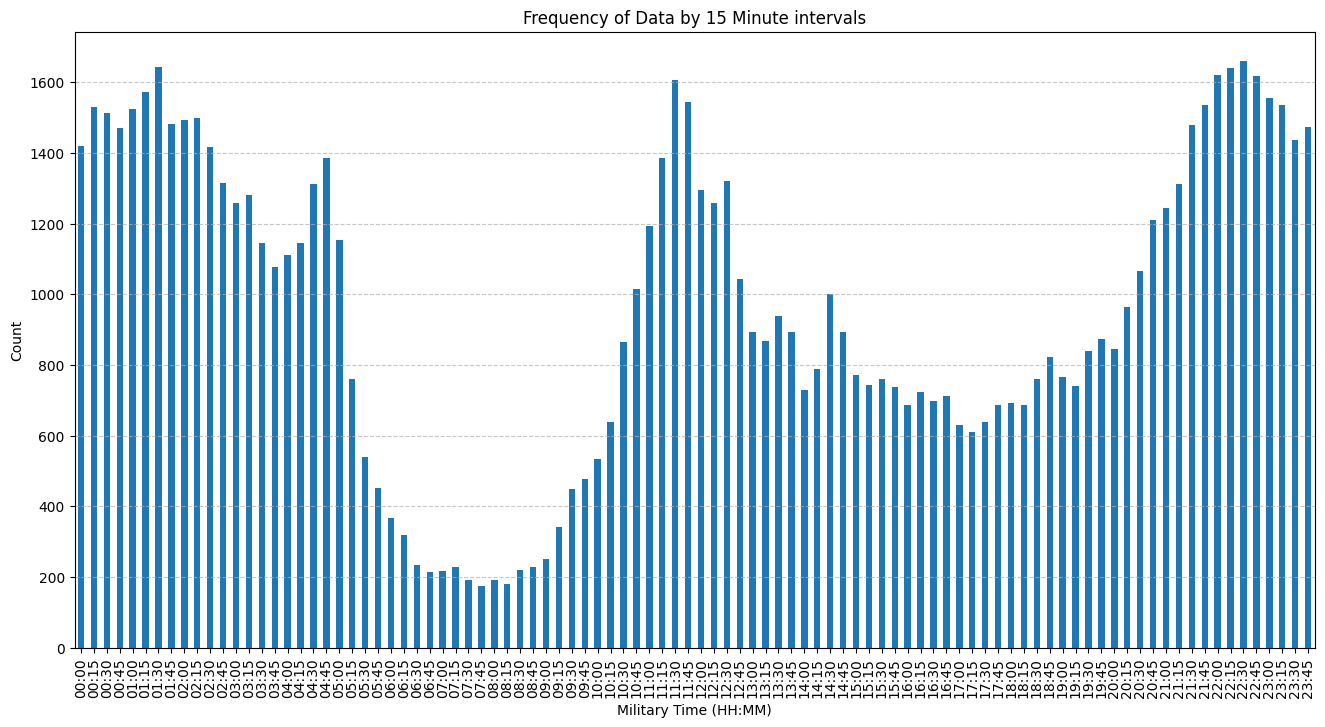

In [33]:
# hours_min is object so needs to be converted to datetime format
hours_mins = pd.to_datetime(hours_mins, format='%H:%M:%S')

# group by hours and 15 min intervals 
grouped_data = hours_mins.dt.strftime('%H:%M').value_counts().sort_index() #Group by unique hour and minute values and counts how many times each occurs.

# Plot the grouped data
plt.figure(figsize=(16, 8))
grouped_data.plot(kind='bar')
plt.title("Frequency of Data by 15 Minute intervals")
plt.xlabel("Military Time (HH:MM)", fontsize= 10)
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Observations:

## - There are two major spikes in the day for taxi services. These busy times are approximately between 8:30pm-5am, then again between 10:30am-1pm.

## - Slowest time of the day is approximately 5:15am-10:15am with a signifiant drop in taxi service. 

## - There is a steady flow of taxi services between 1:15pm-8:15pm.

## EDA: Which are the busiest days of the week?

In [34]:
#Extract days of the week

login2_df['day_of_week'] = login2_df['interval'].dt.dayofweek

In [35]:
login2_df.head()

,interval,hours_minutes,day_of_week
0,1970-01-01 20:00:00,20:00:00,3
1,1970-01-01 20:15:00,20:15:00,3
2,1970-01-01 20:15:00,20:15:00,3
3,1970-01-01 20:15:00,20:15:00,3
4,1970-01-01 20:15:00,20:15:00,3


In [36]:
day_of_week = login2_df['day_of_week']

In [37]:
day_of_week.info

<bound method Series.info of 0        3
1        3
2        3
3        3
4        3
        ..
93137    0
93138    0
93139    0
93140    0
93141    0
Name: day_of_week, Length: 92265, dtype: int32>

In [38]:
# day_of_weekis object so needs to be converted to datetime format
#day_of_week = pd.to_datetime(day_of_week, format='%a')

In [39]:
day_of_week.dtypes

dtype('int32')

In [40]:
day_of_week.head(5)

0    3
1    3
2    3
3    3
4    3
Name: day_of_week, dtype: int32

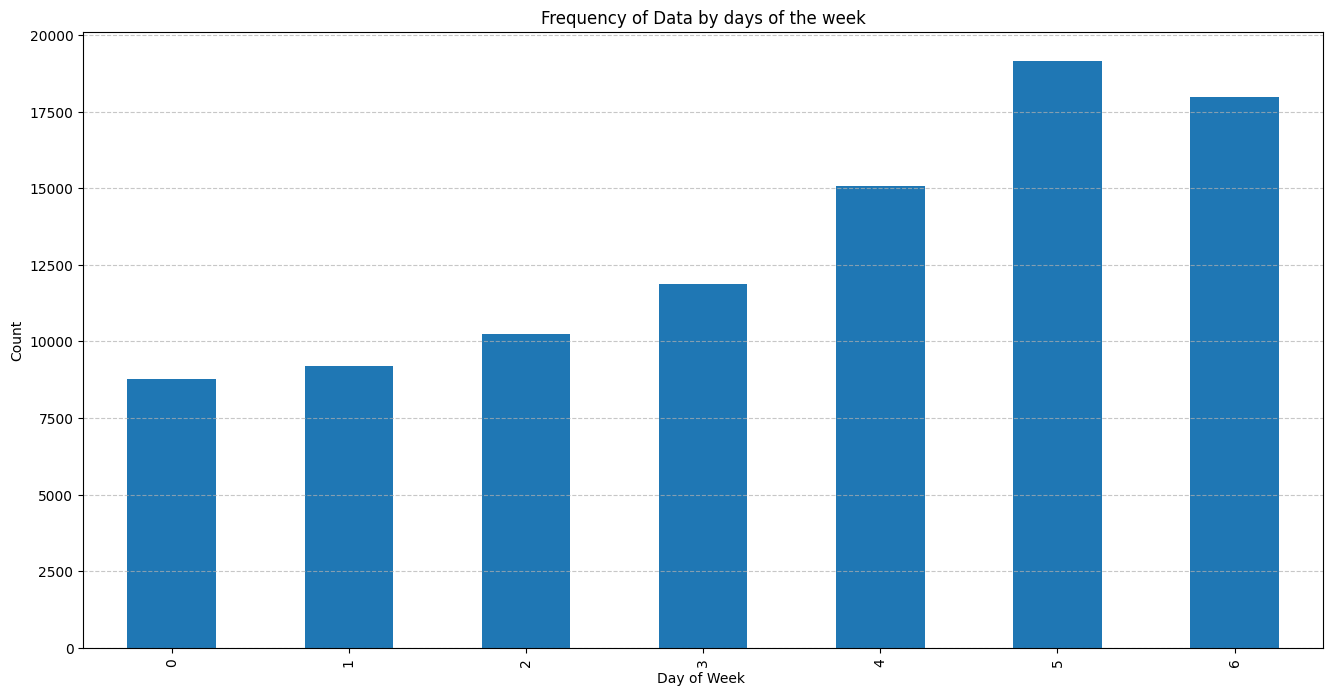

In [41]:
# group by day of week 
grouped_data = day_of_week.value_counts().sort_index() #Group by unique hour and minute values and counts how many times each occurs.

# Plot the grouped data
plt.figure(figsize=(16, 8))
grouped_data.plot(kind='bar')
plt.title("Frequency of Data by days of the week")
plt.xlabel("Day of Week ", fontsize= 10)
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Changed the code to include name of the day of the week

In [42]:
#Create a column with name of day of the week 
login2_df['day_name'] = login2_df['interval'].dt.day_name()

In [43]:
login2_df['day_name']

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
93137      Monday
93138      Monday
93139      Monday
93140      Monday
93141      Monday
Name: day_name, Length: 92265, dtype: object

In [44]:
day_avg = login2_df['day_name'].value_counts()

In [45]:
day_avg.head(7)

day_name
Saturday     19146
Sunday       17963
Friday       15061
Thursday     11864
Wednesday    10257
Tuesday       9194
Monday        8780
Name: count, dtype: int64

In [46]:
saturday_avg = 19146 / len(login2_df['day_name'])


print(f'{round(saturday_avg,2)*100} percent of weekly taxi services occur on Saturday')

sunday_avg = 17963 / len(login2_df['day_name'])

print(f'{round(sunday_avg,2)*100} percent of weekly taxi services occur on Sunday')

friday_avg = 15061 / len(login2_df['day_name'])

print(f'{round(friday_avg,2)*100} percent of weekly taxi services occur on Friday')

thursday_avg = 11864 / len(login2_df['day_name'])

print(f'{round(thursday_avg,2)*100} percent of weekly taxi services occur on Thursday')

wednesday_avg = 10257 / len(login2_df['day_name'])

print(f'{round(wednesday_avg,2)*100} percent of weekly taxi services occur on Wednesday')

tuesday_avg = 9194 / len(login2_df['day_name'])

print(f'{round(tuesday_avg,2)*100} percent of weekly taxi services occur on Tuesday')

monday_avg = 8780 / len(login2_df['day_name'])

print(f'{round(monday_avg,2)*100} percent of weekly taxi services occur on Monday')



21.0 percent of weekly taxi services occur on Saturday
19.0 percent of weekly taxi services occur on Sunday
16.0 percent of weekly taxi services occur on Friday
13.0 percent of weekly taxi services occur on Thursday
11.0 percent of weekly taxi services occur on Wednesday
10.0 percent of weekly taxi services occur on Tuesday
10.0 percent of weekly taxi services occur on Monday


# Observations:

## 56% of taxi services occur on weekends; Saturday, Sunday, Friday.


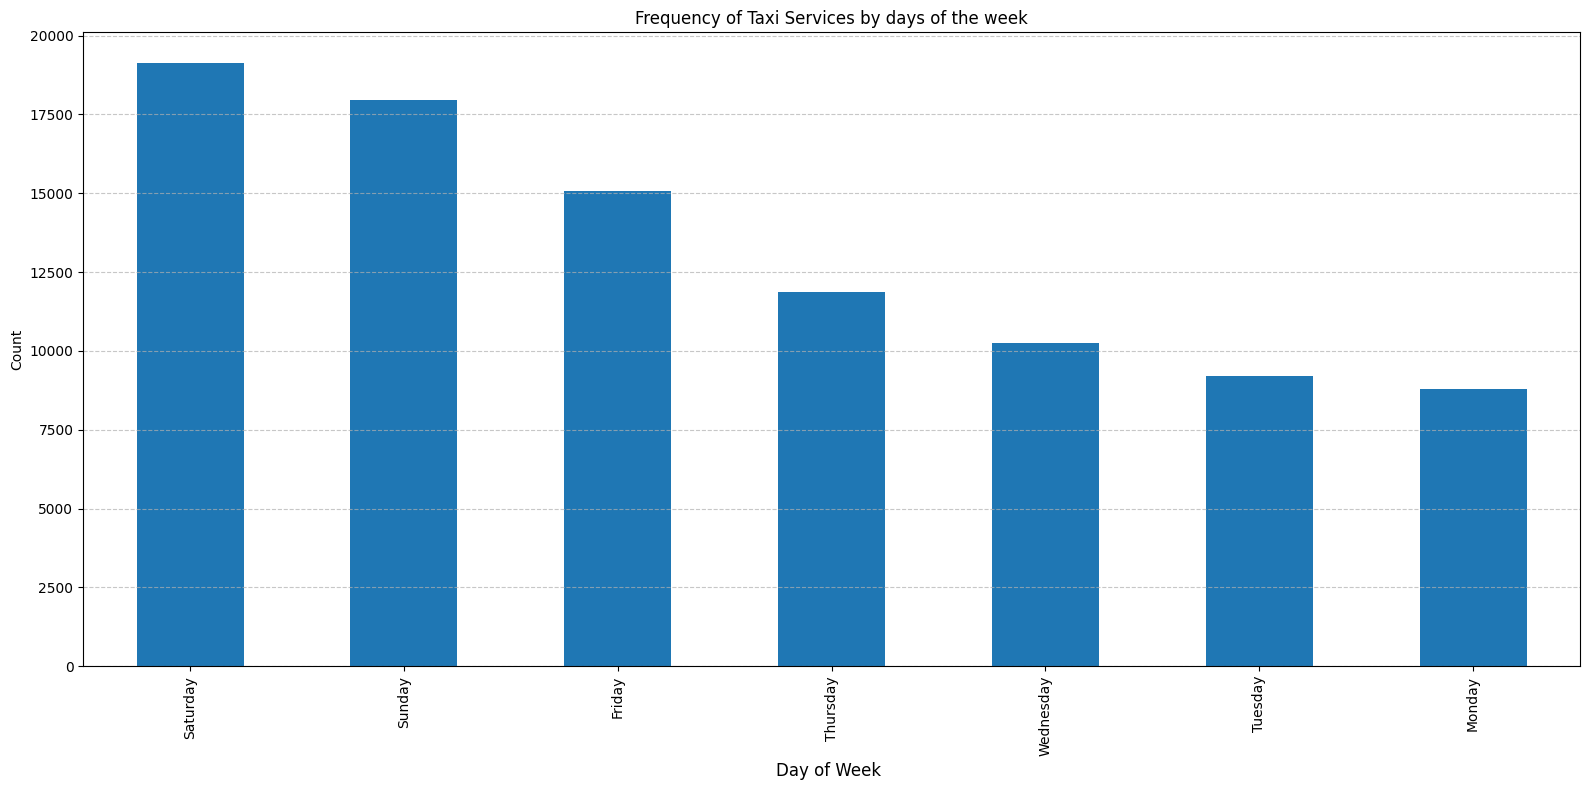

In [47]:
#Visualize which days tend to have most need of taxi service. 

# group by day of week 
grouped_data = login2_df['day_name'].value_counts() #Group by unique days of the week and count how many times each occurs.

# Plot the grouped data
plt.figure(figsize=(16, 8))
grouped_data.plot(kind='bar')
plt.title("Frequency of Taxi Services by days of the week")
plt.xlabel("Day of Week ", fontsize= 12)
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Observations:

## - Weekends: Saturday, Sunday and Friday are the busiest days of the week.

# Part 2

## ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.


However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.


1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    - a) how you will implement the experiment
    - b) what statistical test(s) you will conduct to verify the significance of the observation
    - c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.

# Responses 

1) The key metric that I would choose as a measure of success would be a statistically significant number of tolls paid. Tolls can be used as a measure of how many drivers are moving between Gtham and Metropolis. 




2) There are two statistical tests that I would use to check if the proposed experiement was a success. The first test is a Z-test, I would collect data and determine the mean of tolls paid before the proposed experiment as well as the standard deviation and then the mean for 30 days after the experiement. I would then determine if there is a significant difference between both means. 

The second practical expreimanet that I would conduct to compare the effectiveness of the proposed change would be to analyze data on average number of tolls paid before the proposed change and after the proposed change. I would then determine the means of both datasets "before_change" and "after_change". Once I have both means I will determine if there is an observed difference in these means and if so what that is.

- a) I would conduct to compare the effectiveness of the proposed change would be to analyze data on average number of tolls paid before the proposed change and after the proposed change.


- b) The statistical tests that I will use will be a Permutation test and a Z-test . My null hypothesis would be "There is no statistical difference in average tolls charged before and after the proposed change". The alternative hypothesis will be that "the observed difference in the average number of tolls charged  before_change and after_change is not due to chance". 

Z-test will invovle the following steps:
    - Determine the mean of both datasets ("before_change") and ("after_change").
    - Find difference in both datasets (if one exists).
    - Determine Z-score to see if it is significant.
    - Apply Z-test formula: sample mean - population mean/(std/square toot of sample size).
    - Determine critical value and compare it to Z-statistic. 
    - If z-statistic is greater than critical value reject null hypothesis. 


Permutation test will involve the following steps:
    - Determine the mean of both datasets ("before_change") and ("after_change").
    - Join both datasets.
    - Use permutation to take sample means of both datasets combined.
    - Determine p_value based on permutation sample means and observed difference mean.
    - If p_value is less than 5% reject null hypothesis. 

- c) how you would interpret the results and provide recommendations to the city operations team along with any caveats. 

If the experiments shows that there is a statistically significance in the average number of tolls charged before and after the change then I would inform the city managers that their experiment was a success. If there was not a statistically significant differnec then I would reccommend that the managers stop the experiment because they are lossing money in reimbursments. 


## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

## Data description
● city: city this user signed up in


● phone: primary device for this user


● signup_date: date of account registration; in the form ‘YYYYMMDD’


● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’


● avg_dist: the average distance in miles per trip taken in the first 30 days after signup


● avg_rating_by_driver: the rider’s average rating over all of their trips


● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips


● surge_pct: the percent of trips taken with surge multiplier > 1


● avg_surge: The average surge multiplier over all of this user’s trips


● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up


● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise


● weekday_pct: the percent of the user’s trips occurring during a weekday

# 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [48]:
#Load Ultimate data challenge.json
df = pd.read_json('ultimate_data_challenge.json')
df.head(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [49]:
df['trips_in_first_30_days']

0         4
1         0
2         3
3         9
4        14
         ..
49995     0
49996     1
49997     0
49998     2
49999     0
Name: trips_in_first_30_days, Length: 50000, dtype: int64

# “active” (i.e. took a trip) in the preceding 30 days

In [50]:
df.info

<bound method DataFrame.info of                  city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2   

In [51]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [52]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [53]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

- # Three columns with missing values: avg_rating_of_driver 8122, phone 396, avg_rating_by_driver 201


- ## avg_rating_of_driver has almost a fifth of it total values missing. This is a significant portion and might require advanced imputation techniques. 

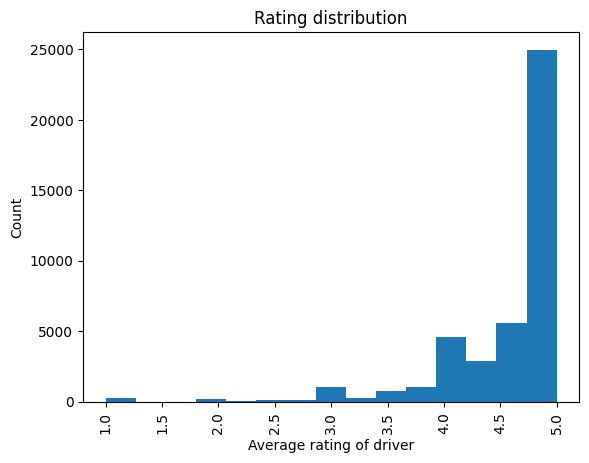

In [54]:
# Visualize distribution of average_rating_of_driver before imputing 

#df['avg_rating_of_driver']

_ = plt.hist(df['avg_rating_of_driver'], bins=15)
_ = plt.xlabel('Average rating of driver')
_ = plt.ylabel('Count')
_ = plt.xticks(rotation=90)
_ = plt.title('Rating distribution')
 

In [55]:
#Statistics for absences 
driver_ratings = df['avg_rating_of_driver'] 

# Calculating statistics
mean = np.mean(driver_ratings)
median = driver_ratings.median()
std_dev = np.std(driver_ratings)

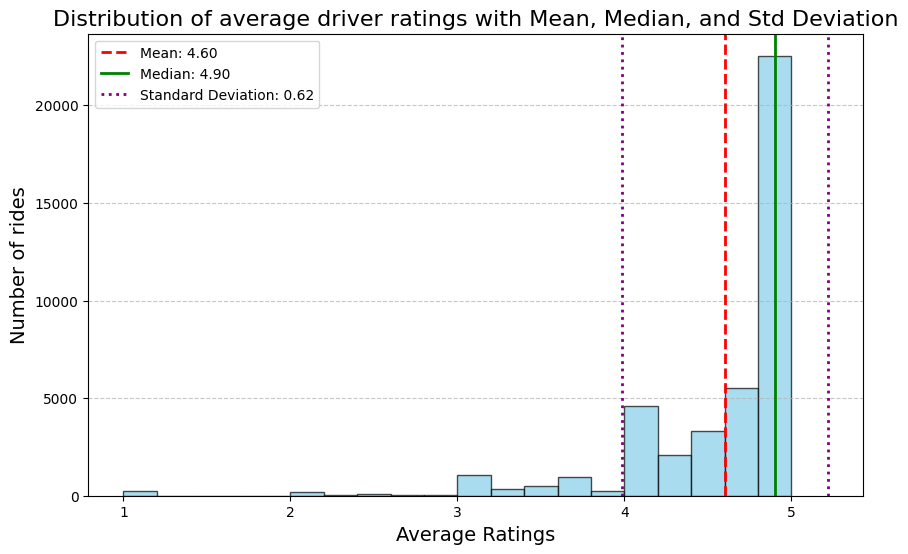

In [56]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(driver_ratings, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for mean, median, and standard deviation
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='solid', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean + std_dev, color='purple', linestyle='dotted', linewidth=2, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean - std_dev, color='purple', linestyle='dotted', linewidth=2)

# Titles and labels
plt.title('Distribution of average driver ratings with Mean, Median, and Std Deviation', fontsize=16)
plt.xlabel('Average Ratings', fontsize=14)
plt.ylabel('Number of rides', fontsize=14)


plt.legend()

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

# Data Imputing for missing values in average_rating_0f_driver

- ## Here I am going to impute the missing values of 'average_rating_of_driver' based on its distribution. This could cause errors later on or not since less than roughly 40% of our values of 'average_rating_of_driver' are missing and will be affected by this imputation.


In [57]:
#Here I drop the null values in 'birth_year' column to get its distribution and use it with np.random.choice()

non_null_rating_of_driver = df['avg_rating_of_driver'].dropna()

In [58]:
#Imputation logic. lambda searches for missing values in df['avg_rating_of_driver'] and replaces null values with a random rating of drivers from 'avg_rating_of_driver' column. 

#I chose this method to maintain the distribution of the 'avg_rating_of_driver' data

df['avg_rating_of_driver'] = df['avg_rating_of_driver'].apply(lambda x: np.random.choice(non_null_rating_of_driver) if pd.isnull(x) else x)

In [59]:
# The missing 8122 have been imputed based on distribution. 
df.isna().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver      201
dtype: int64

In [60]:
# I will drop the missing values of phone and avg_rating_by_driver since these are a very small part and will have little affect during modeling.
df_clean = df.dropna()

In [61]:
df_clean.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

## Comment: Dataset 'df_clean' is now free of missing values 

In [62]:
df_clean.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


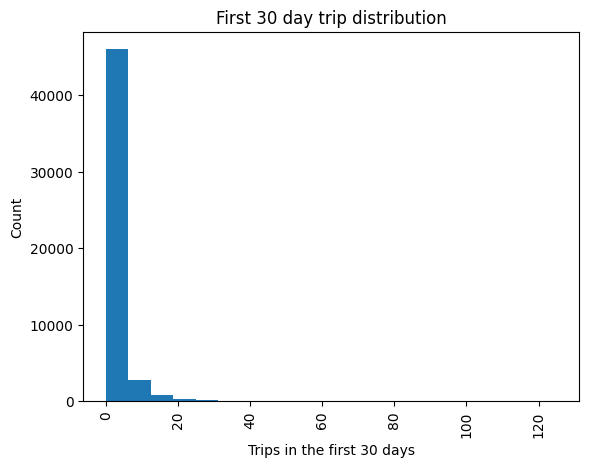

In [63]:
#Explore trips in first 30 days
# Visualize distribution of average_rating_of_driver before imputing 

#df['avg_rating_of_driver']

_ = plt.hist(df['trips_in_first_30_days'],bins=20)
_ = plt.xlabel('Trips in the first 30 days')
_ = plt.ylabel('Count')
_ = plt.xticks(rotation=90)
_ = plt.title('First 30 day trip distribution')


In [64]:
df['trips_in_first_30_days'].mean()

2.2782

In [65]:
df['trips_in_first_30_days'].median()

1.0

In [66]:
df['trips_in_first_30_days'].value_counts()

trips_in_first_30_days
0      15390
1      14108
2       7402
3       3788
4       2562
5       1616
6       1134
7        819
8        589
9        471
10       349
11       301
12       221
13       168
15       155
14       147
17       113
16       108
18        80
19        69
20        51
23        45
21        40
22        34
24        33
27        28
28        21
25        20
26        19
30        15
34        11
29         9
37         9
33         9
32         8
31         6
44         5
40         5
43         4
38         4
39         3
36         3
47         3
42         3
53         2
48         2
49         2
55         2
35         2
54         2
56         2
71         1
73         1
125        1
41         1
50         1
63         1
51         1
58         1
Name: count, dtype: int64

In [67]:
df_clean.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [68]:
df_clean['signup_date'].value_counts().sort_index()

signup_date
2014-01-01    1718
2014-01-02     998
2014-01-03    1197
2014-01-04    1469
2014-01-05    1331
2014-01-06    1739
2014-01-07    1474
2014-01-08    1263
2014-01-09    1415
2014-01-10    1996
2014-01-11    2379
2014-01-12    1318
2014-01-13    1038
2014-01-14    1107
2014-01-15    1096
2014-01-16    1414
2014-01-17    2126
2014-01-18    2915
2014-01-19    1999
2014-01-20    1279
2014-01-21    1218
2014-01-22    1349
2014-01-23    1588
2014-01-24    2237
2014-01-25    2854
2014-01-26    1680
2014-01-27    1220
2014-01-28    1266
2014-01-29    1187
2014-01-30    1457
2014-01-31    2079
Name: count, dtype: int64

In [69]:
df_clean['trips_in_first_30_days'].value_counts().sort_index()

trips_in_first_30_days
0      15219
1      13851
2       7330
3       3759
4       2547
5       1605
6       1128
7        814
8        584
9        470
10       346
11       297
12       218
13       168
14       144
15       154
16       106
17       113
18        80
19        68
20        51
21        38
22        34
23        44
24        33
25        19
26        19
27        27
28        21
29         9
30        15
31         6
32         8
33         9
34        11
35         2
36         3
37         9
38         4
39         3
40         5
41         1
42         3
43         4
44         5
47         3
48         2
49         2
50         1
51         1
53         2
54         2
55         2
56         2
58         1
63         1
71         1
73         1
125        1
Name: count, dtype: int64

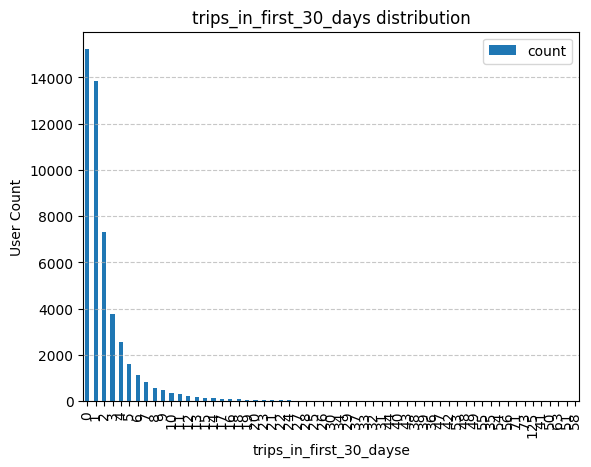

In [70]:
#Visualizing sign up date distribution

grouped_sign_up = df_clean['trips_in_first_30_days'].value_counts()

grouped_sign_up.plot(kind='bar')

plt.title('trips_in_first_30_days distribution')

plt.xlabel('trips_in_first_30_dayse')

plt.ylabel('User Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()


plt.show()

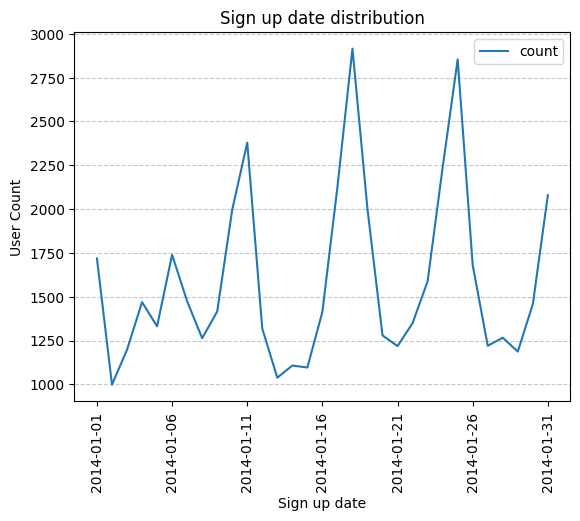

In [71]:
#Visualizing sign up date distribution

grouped_sign_up = df_clean['signup_date'].value_counts().sort_index()

grouped_sign_up.plot(kind='line')

plt.title('Sign up date distribution')

plt.xlabel('Sign up date')

plt.ylabel('User Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.xticks(rotation = 90)
plt.show()

In [72]:
df_clean['last_trip_date'].describe()

count          49406
unique           182
top       2014-06-29
freq            2016
Name: last_trip_date, dtype: object

In [73]:
df_clean['last_trip_date'].max()

'2014-07-01'

In [74]:
df_clean['last_trip_date'].min()

'2014-01-01'

In [75]:
df_clean['last_trip_date'].value_counts()

last_trip_date
2014-06-29    2016
2014-06-28    1669
2014-06-30    1401
2014-06-27    1107
2014-06-22    1018
              ... 
2014-03-11      79
2014-02-19      78
2014-02-20      73
2014-03-04      67
2014-03-10      66
Name: count, Length: 182, dtype: int64

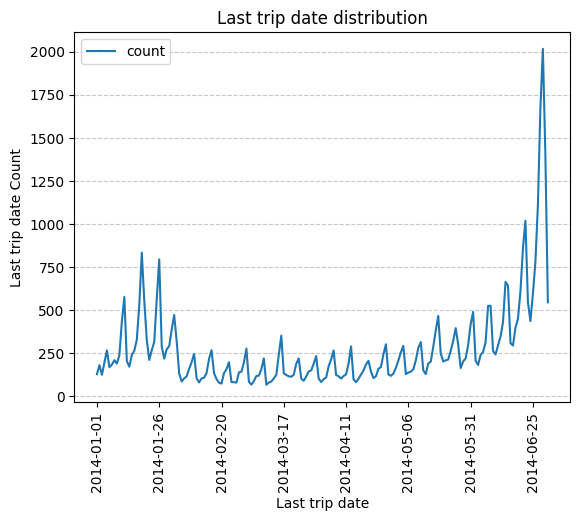

In [76]:
grouped_last_trip = df_clean['last_trip_date'].value_counts().sort_index()

grouped_last_trip.plot(kind='line')

plt.title('Last trip date distribution')

plt.xlabel('Last trip date')

plt.ylabel('Last trip date Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.xticks(rotation = 90)
plt.show()

# Observation: There appears to be a clear pattern of seasonality with trip frequency increasing mid January and again in the middle of June. 

In [77]:
# Convert 'last_trip_date' to datetime
df_clean['last_trip_date'] = pd.to_datetime(df_clean['last_trip_date'])

# Find the newest date in 'last_trip_date'
newest_date = df_clean['last_trip_date'].max()

# Create a mask for rows within 30 days of the newest date
mask = df_clean['last_trip_date'] >= (newest_date - pd.Timedelta(days=30))

# Step 4: Filter the DataFrame
df_filtered = df_clean[mask]

# Display results
print("Newest date:", newest_date)
print("\nFiltered DataFrame:")
print(df_filtered)

Newest date: 2014-07-01 00:00:00

Filtered DataFrame:
                 city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
3      King's Landing                       9  2014-01-10   
5          Winterfell                       2  2014-01-09   
13     King's Landing                       0  2014-01-29   
16     King's Landing                       1  2014-01-11   
...               ...                     ...         ...   
49976  King's Landing                       0  2014-01-21   
49988  King's Landing                       1  2014-01-20   
49991      Winterfell                       0  2014-01-08   
49993         Astapor                       3  2014-01-03   
49995  King's Landing                       0  2014-01-25   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
3                       4.6       1.14     2014-06-29   iPh

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/799141829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['last_trip_date'] = pd.to_datetime(df_clean['last_trip_date'])


In [78]:
print(len(df_filtered))

18635


# Feature Engineering: 
- ## Create 'active' column which will be numeric 1 for active and 0 for not active. Active is defined as used service with in the last 30 days. 

In [79]:
# Create active column filled with 0 to start

df_clean['active'] = 0

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/3686604369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['active'] = 0


In [80]:
df_clean.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


## Replace 0 with 1 for all that fall under active condintion 

In [81]:
df_clean['active'] = mask.map(lambda x: 1 if x else 0)

df_clean['active'].head()

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/1661604040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['active'] = mask.map(lambda x: 1 if x else 0)


0    1
1    0
2    0
3    1
4    0
Name: active, dtype: int64

In [82]:
#Count number of active and inactive users 
df_clean['active'].value_counts()

active
0    30771
1    18635
Name: count, dtype: int64

In [83]:
#Count total users in dataset
df_clean['active'].value_counts().sum()

49406

In [84]:
#Determine percent of active users 
percent_active = round((18635/49406) * 100)
print(f'Roughly {percent_active}% of Ultimate customers are active.')

Roughly 38% of Ultimate customers are active.


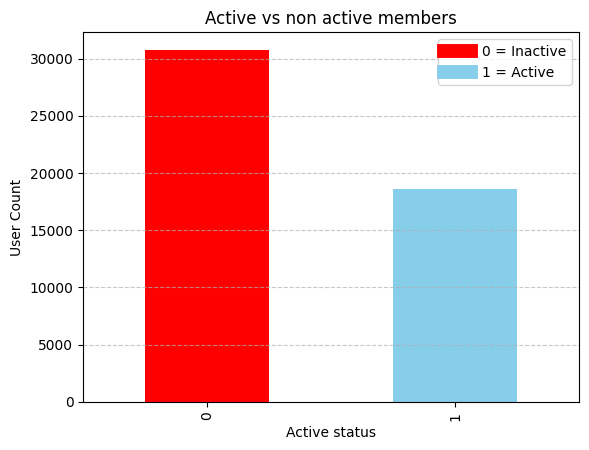

In [85]:
#Visualize Inactive and Active users 
grouped_data = df_clean['active'].value_counts()

grouped_data.plot(kind='bar', color=['red','skyblue'])



plt.title('Active vs non active members')

plt.xlabel('Active status')

plt.ylabel('User Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(handles=[
    plt.Line2D([0], [0], color='red', lw=10, label='0 = Inactive'),
    plt.Line2D([0], [0], color='skyblue', lw=10, label='1 = Active')
], loc='upper right')
plt.show()

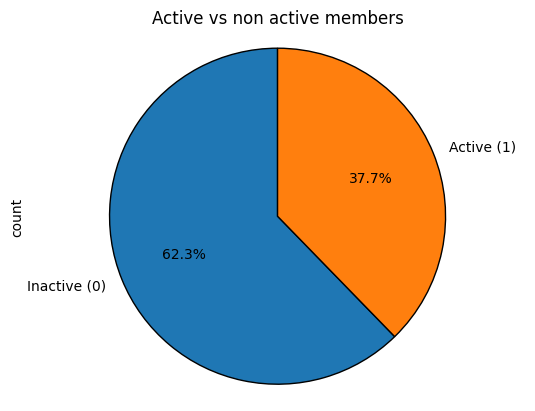

In [86]:
#use pie chart for better visualization 
grouped_data = df_clean['active'].value_counts()

grouped_data.plot(kind='pie',labels=['Inactive (0)', 'Active (1)'], autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor': 'black'})



plt.title('Active vs non active members')

plt.axis('equal')

plt.show()

## Observations: Approximately 38% of Ultimate customers are condsidered 'active'.

In [87]:
df_clean['last_trip_date'].dtypes

dtype('<M8[ns]')

In [88]:
df_clean['last_trip_date'].head()

0   2014-06-17
1   2014-05-05
2   2014-01-07
3   2014-06-29
4   2014-03-15
Name: last_trip_date, dtype: datetime64[ns]

## Feature (days since last trip)

In [89]:
#Create days since last used 

df_clean['days_since_last_trip'] = (df_clean['last_trip_date'].max() - df_clean['last_trip_date'])

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/2285145897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['days_since_last_trip'] = (df_clean['last_trip_date'].max() - df_clean['last_trip_date'])


In [90]:
df_clean['days_since_last_trip'].dtypes

dtype('<m8[ns]')

## Feature (days since signed up)

In [91]:
df_clean['signup_date'].dtype

dtype('O')

In [92]:
df_clean['signup_date'] = pd.to_datetime(df_clean['signup_date'])

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/153956697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['signup_date'] = pd.to_datetime(df_clean['signup_date'])


In [93]:
df_clean['days_since_signup'] = (df_clean['last_trip_date'].max() - df_clean['signup_date'])

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/4104210845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['days_since_signup'] = (df_clean['last_trip_date'].max() - df_clean['signup_date'])


In [94]:
df_clean.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_since_last_trip,days_since_signup
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,14 days,157 days
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,57 days,153 days
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,175 days,176 days
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,2 days,172 days
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,108 days,155 days


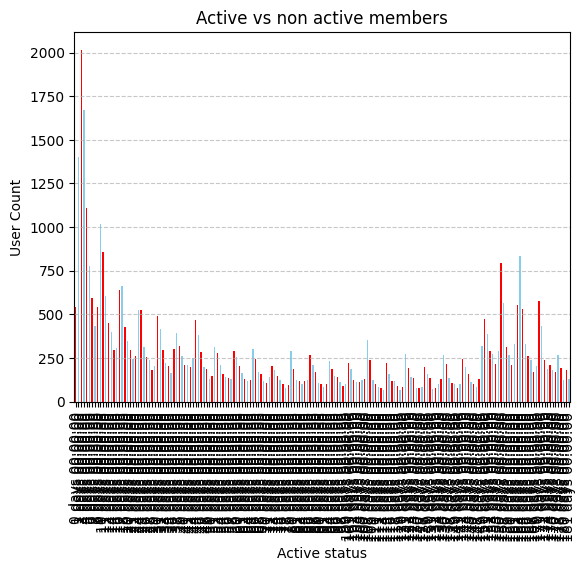

In [95]:
#Visualize Inactive and Active users 
grouped_days = df_clean['days_since_last_trip'].value_counts().sort_index()

grouped_days.plot(kind='bar', color=['red','skyblue'])



plt.title('Active vs non active members')

plt.xlabel('Active status')

plt.ylabel('User Count')

plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.




In [96]:
df_clean.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_since_last_trip,days_since_signup
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,14 days,157 days
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,57 days,153 days
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,175 days,176 days
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,2 days,172 days
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,108 days,155 days


# Preprocessing 

In [97]:
df_clean.dtypes

city                               object
trips_in_first_30_days              int64
signup_date                datetime64[ns]
avg_rating_of_driver              float64
avg_surge                         float64
last_trip_date             datetime64[ns]
phone                              object
surge_pct                         float64
ultimate_black_user                  bool
weekday_pct                       float64
avg_dist                          float64
avg_rating_by_driver              float64
active                              int64
days_since_last_trip      timedelta64[ns]
days_since_signup         timedelta64[ns]
dtype: object

In [98]:
#Binary features mapping for ultimate black user 

binary_columns = ['ultimate_black_user']


df_clean[binary_columns] = df_clean[binary_columns].apply(lambda x : x.map({True:1, False:0}))

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/2426912252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[binary_columns] = df_clean[binary_columns].apply(lambda x : x.map({True:1, False:0}))


In [99]:
df_clean.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_since_last_trip,days_since_signup
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1,14 days,157 days
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0,57 days,153 days
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0,175 days,176 days
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1,2 days,172 days
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,108 days,155 days


In [100]:
df_clean['days_since_last_trip'].head()

0    14 days
1    57 days
2   175 days
3     2 days
4   108 days
Name: days_since_last_trip, dtype: timedelta64[ns]

In [101]:
#df_clean_no_date = df_clean.drop(columns=['signup_date','last_trip_date'])

In [102]:
df_clean['days_since_last_trip'] = df_clean['days_since_last_trip'].dt.days

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/1964700591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['days_since_last_trip'] = df_clean['days_since_last_trip'].dt.days


In [103]:
df_clean['days_since_last_trip'].head()

0     14
1     57
2    175
3      2
4    108
Name: days_since_last_trip, dtype: int64

In [104]:
df_clean['days_since_signup'] = df_clean['days_since_signup'].dt.days



/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_35853/744590844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['days_since_signup'] = df_clean['days_since_signup'].dt.days


In [105]:
df_clean['days_since_signup'].head()

0    157
1    153
2    176
3    172
4    155
Name: days_since_signup, dtype: int64

In [106]:
#Drop datetime columns
df_clean = df_clean.drop(columns=['signup_date','last_trip_date'])

In [107]:
df_clean['days_since_signup'].dtypes

dtype('int64')

In [108]:
df_clean['days_since_signup'].head()

0    157
1    153
2    176
3    172
4    155
Name: days_since_signup, dtype: int64

In [109]:
df_clean.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_since_last_trip,days_since_signup
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1,14,157
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0,57,153
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0,175,176
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1,2,172
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0,108,155


In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[['days_since_last_trip', 'days_since_signup']] = scaler.fit_transform(df_clean[['days_since_last_trip', 'days_since_signup']])


In [111]:
df_clean['days_since_last_trip'].dtype

dtype('float64')

In [112]:
df_clean.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_since_last_trip,days_since_signup
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1,-0.947360,-0.966320
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0,-0.249654,-1.423094
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0,1.664982,1.203351
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1,-1.142068,0.746578
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0,0.577858,-1.194707


In [113]:
df_clean.dtypes

city                       object
trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
phone                      object
surge_pct                 float64
ultimate_black_user         int64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
active                      int64
days_since_last_trip      float64
days_since_signup         float64
dtype: object

In [114]:
#Encode phone column as binary 
#df_clean_no_date['phone'] = df_clean_no_date['phone'].map({'iPhone':1, 'Android':0})

In [115]:
#Iteration of phone feature to use one-hot instead of mapping as I did in the cell above

# Values of 0 (Android) and 1 (iPhone)
df_clean_no_date = pd.get_dummies(df_clean, columns=['phone'], prefix='phone', drop_first=False)

print(df_clean_no_date.head())

             city  trips_in_first_30_days  avg_rating_of_driver  avg_surge  \
0  King's Landing                       4                   4.7       1.10   
1         Astapor                       0                   5.0       1.00   
2         Astapor                       3                   4.3       1.00   
3  King's Landing                       9                   4.6       1.14   
4      Winterfell                      14                   4.4       1.19   

   surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0       15.4                    1         46.2      3.67   
1        0.0                    0         50.0      8.26   
2        0.0                    0        100.0      0.77   
3       20.0                    1         80.0      2.36   
4       11.8                    0         82.4      3.13   

   avg_rating_by_driver  active  days_since_last_trip  days_since_signup  \
0                   5.0       1             -0.947360          -0.966320   
1                 

In [116]:
#One hot-encoding

df_encoded = pd.get_dummies(df_clean_no_date, columns=['city'])#, drop_first=True)

In [117]:
df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_since_last_trip,days_since_signup,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,-0.947360,-0.966320,False,True,False,True,False
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,-0.249654,-1.423094,True,False,True,False,False
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1.664982,1.203351,False,True,True,False,False
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,-1.142068,0.746578,False,True,False,True,False
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0.577858,-1.194707,True,False,False,False,True


In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

In [119]:
df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,days_since_last_trip,days_since_signup,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,0.451637,0.160596,0.114853,0.329473,1,-0.397411,-0.375668,0.496834,1,-0.947360,-0.966320,False,True,False,True,False
1,-0.601237,0.647000,-0.337622,-0.444787,0,-0.294772,0.440002,0.496834,0,-0.249654,-1.423094,True,False,True,False,False
2,0.188418,-0.487944,-0.337622,-0.444787,0,1.055747,-0.891016,0.496834,0,1.664982,1.203351,False,True,True,False,False
3,1.767729,-0.001539,0.295844,0.560746,1,0.515540,-0.608463,0.273175,1,-1.142068,0.746578,False,True,False,True,False
4,3.083822,-0.325809,0.522081,0.148477,0,0.580365,-0.471629,0.273175,0,0.577858,-1.194707,True,False,False,False,True


In [120]:
df_encoded.dtypes

trips_in_first_30_days    float64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user         int64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
active                      int64
days_since_last_trip      float64
days_since_signup         float64
phone_Android                bool
phone_iPhone                 bool
city_Astapor                 bool
city_King's Landing          bool
city_Winterfell              bool
dtype: object

In [121]:
corr_matrix = df_encoded.corr()

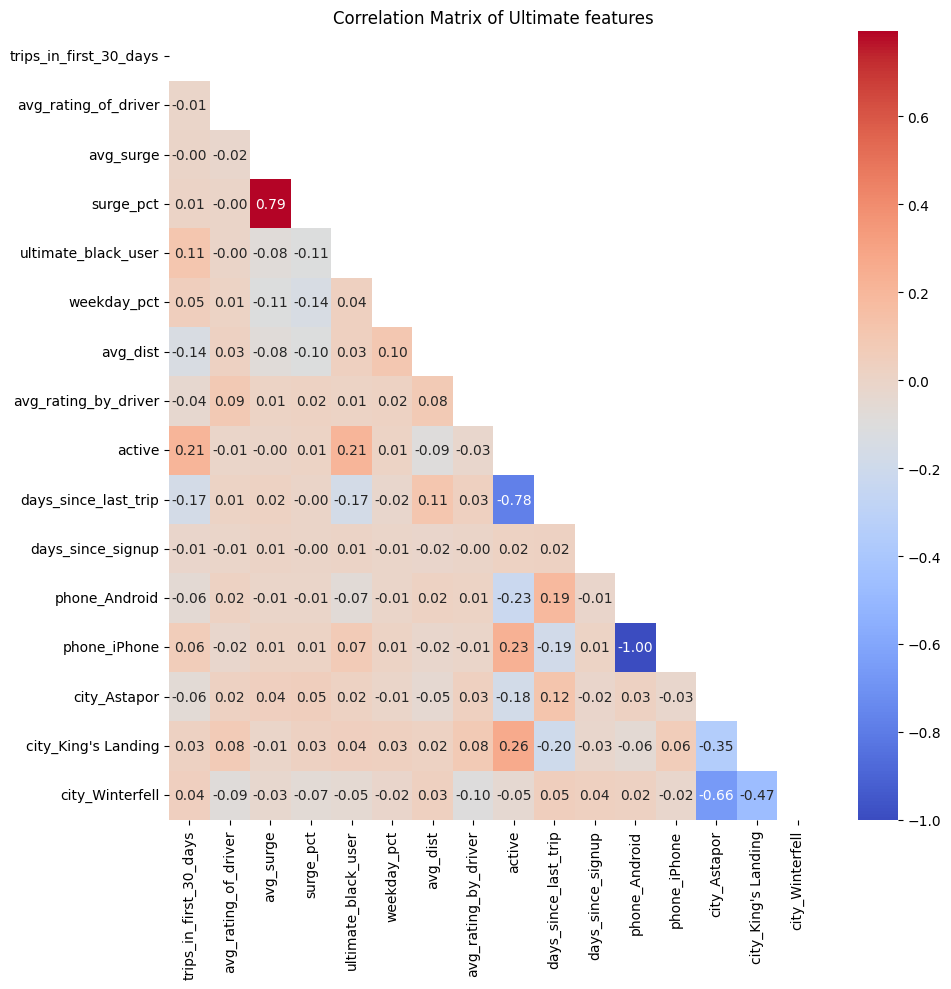

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f",mask=mask)

plt.title('Correlation Matrix of Ultimate features')

plt.tight_layout()
plt.show()

## Observations: Strong correlation between 'active' and the following features: 
## - 'iPhone' 
## - 'ultimate_black_user' 
## - 'trips_in_first_30_days' 
## - 'city_King's Landing'

# ML Modeling

In [123]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio

from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge 

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

#Random Search 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy.stats import uniform


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [124]:
! pip install xgboost

from xgboost import XGBRegressor


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [125]:
df_encoded.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active', 'days_since_last_trip',
       'days_since_signup', 'phone_Android', 'phone_iPhone', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell'],
      dtype='object')

## Train_Test_Split

In [127]:
X = df_encoded.drop(['active','days_since_last_trip'], axis=1) #dropping target variable and days since last trip since this is a key in predicting if they have used the service in last 30 days

y = df_encoded['active'] #Target variable 
 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [128]:
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
print(datetime_columns)


Index([], dtype='object')


## Classification Models

### Logistic regression model 

In [129]:
#Instantiate the model: I am using multi_class='multinomial' since my classification is multiclass. solver='lbfgs' is the optimization algorithm which works well on small-medium datasets such as mine.
logreg_model = LogisticRegression(solver='lbfgs', random_state=42)

# if I want to predict grade category (LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=22))

#fit the model
logreg_model.fit(X_train, y_train)

#predict
y_pred = logreg_model.predict(X_test)

### Metrics for logreg_model

In [130]:
#Check model accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7165641191709845
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      7684
           1       0.67      0.49      0.57      4668

    accuracy                           0.72     12352
   macro avg       0.70      0.67      0.68     12352
weighted avg       0.71      0.72      0.71     12352



In [131]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[6557 1127]
 [2374 2294]]


### Metrics for log_reg model: Crossvalidation score

In [132]:
# Perform 5-fold cross-validation to check generalization
cross_val_scores = cross_val_score(logreg_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")

Cross-Validation Accuracy: 0.7190856827151382


### Hyperparameter tunning on log_reg model

In [133]:
# Hyperparameter grid
param_distributions = {
    'C': uniform(0.01, 100),  # C values between 0.01 and 100
    'penalty': ['l2'],  # Only L2 regularization since 'lbfgs' solver does not support L1
    'solver': ['lbfgs'],  # Solver choice
    'max_iter': [100, 200, 300]  # Number of iterations for convergence
}

In [134]:
# Initialize the RandomizedSearchCV with Logistic Regression
random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=22,  # Ensure reproducibility
    n_jobs=-1  # Use all available cores
)

In [135]:
# Fit Randomized Search on training data

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13863d400>,
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs']},
                   random_state=22, scoring='accuracy', verbose=1)

In [136]:
#Print best parameters

print('Best Parameters', random_search.best_params_)

#Print best cross-val score

print('Best Cross-Validation Score:', random_search.best_score_)

Best Parameters {'C': 20.856053735884263, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.7191126659845279


In [137]:
# Evaluate the best model on the test set
best_logreg_model = random_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.7166450777202072
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      7684
           1       0.67      0.49      0.57      4668

    accuracy                           0.72     12352
   macro avg       0.70      0.67      0.68     12352
weighted avg       0.71      0.72      0.71     12352

Confusion Matrix:
[[6557 1127]
 [2373 2295]]


### Best Parameters {'C': 20.856053735884263, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.7191126659845279

In [138]:
#Best Params model 
Best_logreg_model = LogisticRegression(C=20.856053735884263, max_iter=100, penalty='l2',solver='lbfgs', random_state=42)


#fit the model
Best_logreg_model.fit(X_train, y_train)

#predict
y_pred = logreg_model.predict(X_test)

In [139]:
# Perform 5-fold cross-validation to check generalization
cross_val_scores = cross_val_score(Best_logreg_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")

Cross-Validation Accuracy: 0.7191126659845279


In [140]:
# Evaluate the best model from RandomizedSearchCV on the test set
best_logreg_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_logreg_model.predict(X_test)

# Calculate Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Test Accuracy: 0.7166450777202072
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      7684
           1       0.67      0.49      0.57      4668

    accuracy                           0.72     12352
   macro avg       0.70      0.67      0.68     12352
weighted avg       0.71      0.72      0.71     12352

Confusion Matrix:
[[6557 1127]
 [2373 2295]]


### Model 2: Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

Test Accuracy: 0.7726683937823834
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      7684
           1       0.72      0.65      0.68      4668

    accuracy                           0.77     12352
   macro avg       0.76      0.75      0.75     12352
weighted avg       0.77      0.77      0.77     12352



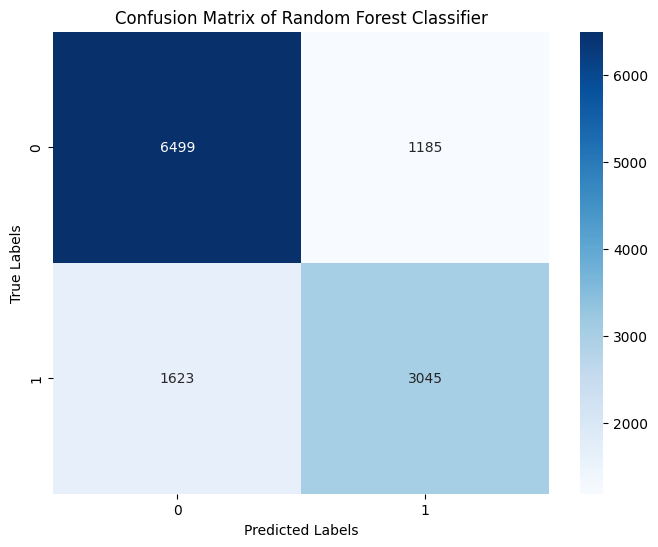

In [143]:
# Initialize the Random Forest Classifier with some basic parameters
# You can adjust n_estimators (number of trees) and max_depth (depth of each tree) for tuning
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight="balanced",random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Hyperparameter Tunning

In [144]:
! pip install scikit-optimize


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [145]:
from skopt import BayesSearchCV

In [146]:
# Define the parameter search space
param_space = {
    'n_estimators': (50, 300),                   # Number of trees in the forest
    'max_depth': (5, 20),                        # Depth of each tree
    'min_samples_split': (2, 10),                # Minimum samples required to split an internal node
    'min_samples_leaf': (1, 4),                  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider at each split
}

# Set up the Bayesian Optimization with cross-validation (cv=5)
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=param_space,
    n_iter=25,                  # Number of iterations (I will try 25 to start, then adjust as needed)
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',         # Scoring metric (you can adjust based on goals)
    n_jobs=-1,                  # Use all processors
    verbose=2,
    random_state=22
)

# Fit the BayesSearchCV
bayes_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validation Score:", bayes_search.best_score_)

# Use the best model to predict on the test set
best_rf_model = bayes_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   2.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   2.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   2.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   2.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   2.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=291; total time=   7.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=291; total time=   7.3s
[CV] END max_depth=8, max_features=sqrt, min_samp

Best Parameters: OrderedDict({'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 291})
Best Cross-Validation Score: 0.7826144672060772
Test Accuracy: 0.7895887305699482
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      7684
           1       0.75      0.67      0.71      4668

    accuracy                           0.79     12352
   macro avg       0.78      0.77      0.77     12352
weighted avg       0.79      0.79      0.79     12352

### Metrics for best_rf_model

Test Accuracy: 0.7895887305699482
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      7684
           1       0.75      0.67      0.71      4668

    accuracy                           0.79     12352
   macro avg       0.78      0.77      0.77     12352
weighted avg       0.79      0.79      0.79     12352



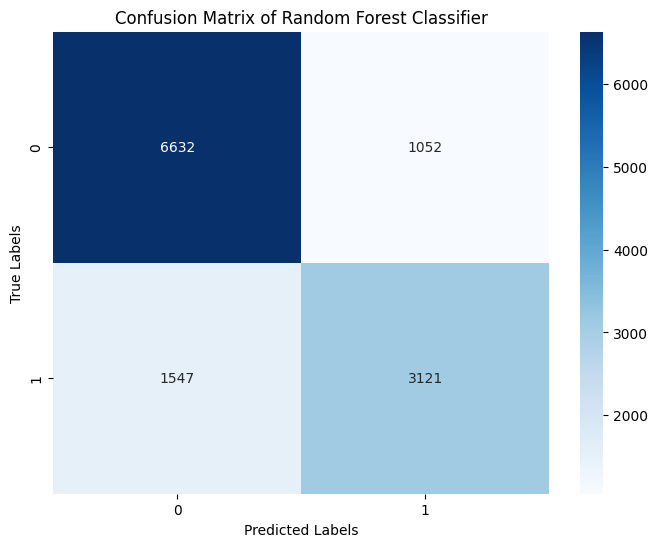

In [148]:
# Initialize the Random Forest Classifier with some basic parameters
# You can adjust n_estimators (number of trees) and max_depth (depth of each tree) for tuning
best_rf_model = RandomForestClassifier(n_estimators=291, max_depth=12, max_features='sqrt', min_samples_leaf=3, min_samples_split=10,random_state=42) # Adding (class_weight="balanced") significantly improved results!

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Feature Importance

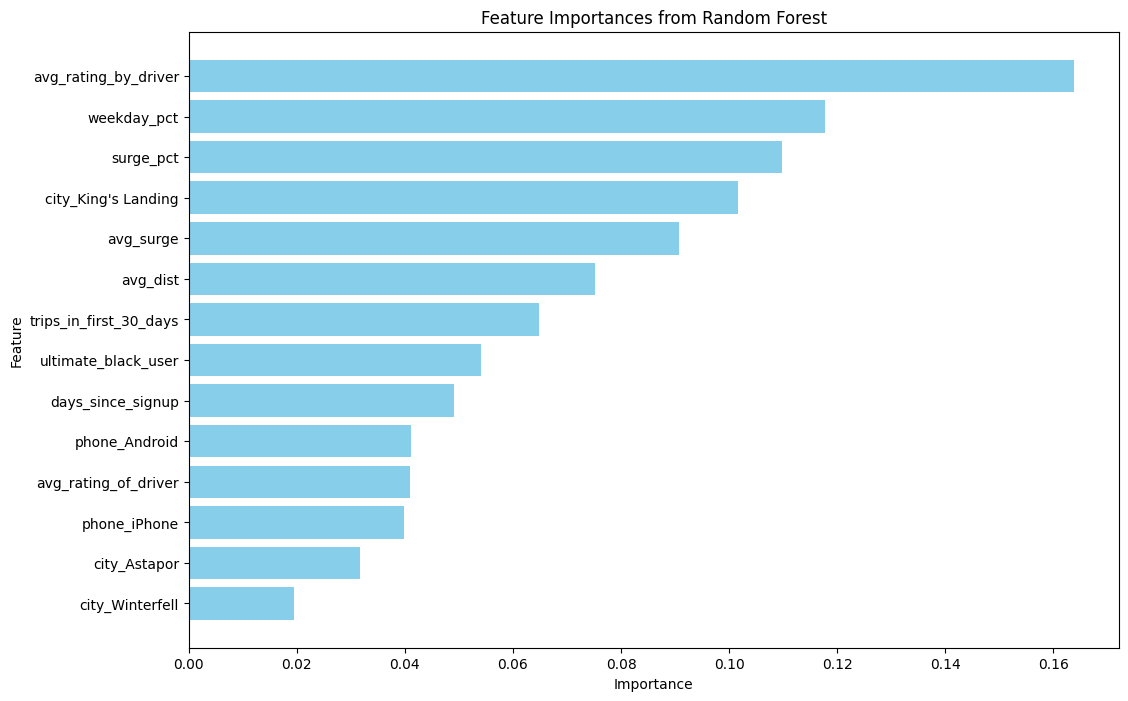

In [149]:
# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Observations of Random Forest Classifier: Random Forest Classifier is performing better than logisitc regression model. It achieved test accuracy of 78%, It precision score for active members is 75%, Recall is 66% and f1-score is 70. These scores are not ideal and I will have to reiterate and add features to my model or try a different model. 

# XGBOOST model 

In [150]:
! pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
#X = df_encoded.drop('active','days_since', axis=1) #dropping target variable

#y = df_encoded['active'] #Target variable 
 


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [151]:
from xgboost import XGBClassifier, XGBRegressor

In [152]:
model = XGBClassifier(objective='binary:logistic', random_state=42)


In [153]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [154]:
y_pred = model.predict(X_test)


In [155]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.7872
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      7684
           1       0.74      0.68      0.71      4668

    accuracy                           0.79     12352
   macro avg       0.78      0.77      0.77     12352
weighted avg       0.78      0.79      0.79     12352



## Hyperparameter tunning on Xgboost model

In [156]:
model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}



In [157]:
from sklearn.model_selection import RandomizedSearchCV

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available CPU cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learni

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [158]:
# Best parameters from grid search
print("Best Hyperparameters:", random_search.best_params_)

# Use the best estimator to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate model performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Accuracy: 0.7906
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      7684
           1       0.74      0.68      0.71      4668

    accuracy                           0.79     12352
   macro avg       0.78      0.77      0.77     12352
weighted avg       0.79      0.79      0.79     12352



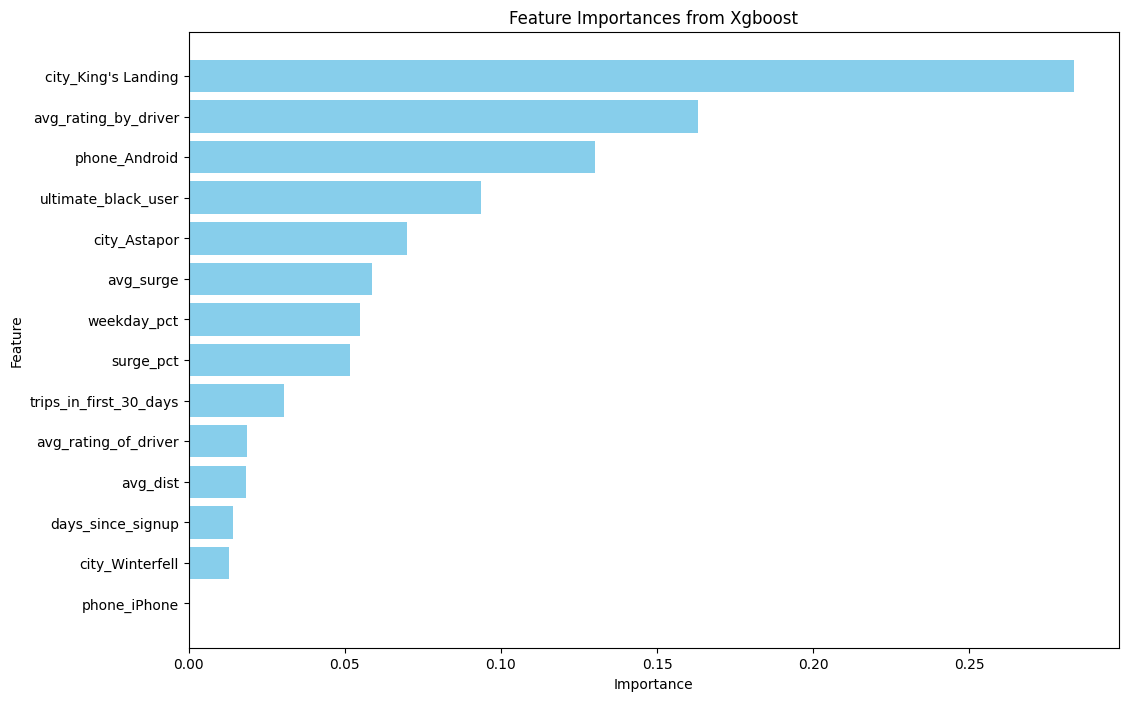

In [159]:
# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title("Feature Importances from Xgboost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.



### Response: I chose to try a few classification models such as logistic regression model which did poorly. I then decided to try a random forest classifier which performed significantly better than the logistic regression model. This model correclty predicted 75% of active users. The final model which I tried was an Xgboosted model this model had an overall score of 79%. The model had a precision score of 82% when predicting inactive users and a precision score of 75% in predicting if a user would be active. I would like to improve these metric score and to do so I will have to engage in feature engineering to capture essential hidden relationships between features that have not been captured by the models. Dataset is imbalanced so other methods to improve model performance include SMOTE. 


# 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

## Insights gained from classification models: The most important features in the two best models were avg_rating_by_driver, city_King's landing and phone. 

### Ultimate inc can leverage these insights by increasing marketing to attract new customers in the city of King's landing as this city seems to produce the most long term riders. Ultimate can also implement programs to motivate drivers to provide exceptional service to customers as this also seems to be an important feature in predicting active customers. 